In [88]:
import numpy as np

from scipy.interpolate import interp1d
from scipy.signal import argrelmin

from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

import os
import pickle

# Load Positions

In [92]:
run_folder = "track_data/Straight_Line/run-2"
positions = pickle.load(open(os.path.join(run_folder, "positions.pkl"), "rb"))

raw_points = [list(pos['position'].to_numpy()) for pos in positions]
    
# remove duplicates:
points = [raw_points[0]]
for point in raw_points[1:]:
    if point != points[-1]:
        points.append(point)

points = np.array(points)
points.shape

(63, 3)

# Testing

In [45]:
points = np.array([[0, 0, 0], 
                   [10, 0, 0],
                   [100, 0, 0]])
points

array([[  0,   0,   0],
       [ 10,   0,   0],
       [100,   0,   0]])

# Parametric Curve

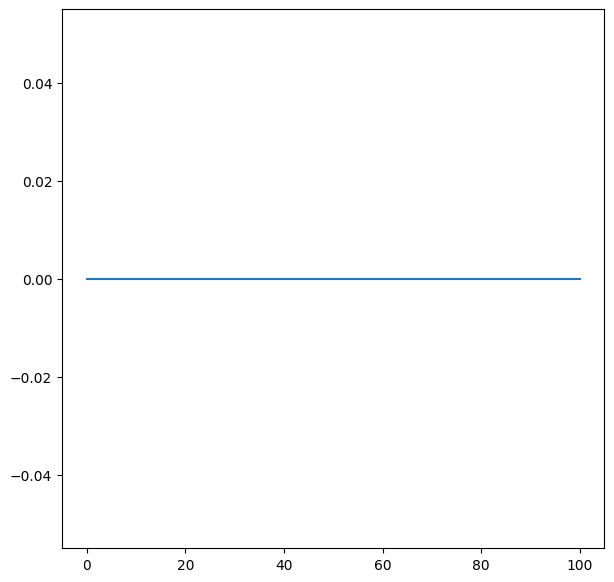

In [46]:
# Linear length along the line:
distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )))
distance = np.insert(distance, 0, 0)/distance[-1]

# Interpolation for different methods:
interpolations_methods = ['slinear']
alpha = np.linspace(0, 1, 1000)

interpolated_points = {}
for method in interpolations_methods:
    interpolator =  interp1d(distance, points, kind=method, axis=0)
    interpolated_points[method] = interpolator(alpha)

# Graph:
plt.figure(figsize=(7,7))
for method_name, curve in interpolated_points.items():
    plt.plot(*curve[:, [0, 2]].T, '-', label=method_name);

# plt.plot(*points[:, [0, 2]].T, 'ok', label='original points');
# plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');

In [63]:
distance = np.array([0, 0.5, 1])

In [64]:
interpolator =  interp1d(distance, points, kind='slinear', axis=0)
alpha = np.linspace(0, 1, 100)
curve = interpolator(alpha)
curve

array([[  0.        ,   0.        ,   0.        ],
       [  0.2020202 ,   0.        ,   0.        ],
       [  0.4040404 ,   0.        ,   0.        ],
       [  0.60606061,   0.        ,   0.        ],
       [  0.80808081,   0.        ,   0.        ],
       [  1.01010101,   0.        ,   0.        ],
       [  1.21212121,   0.        ,   0.        ],
       [  1.41414141,   0.        ,   0.        ],
       [  1.61616162,   0.        ,   0.        ],
       [  1.81818182,   0.        ,   0.        ],
       [  2.02020202,   0.        ,   0.        ],
       [  2.22222222,   0.        ,   0.        ],
       [  2.42424242,   0.        ,   0.        ],
       [  2.62626263,   0.        ,   0.        ],
       [  2.82828283,   0.        ,   0.        ],
       [  3.03030303,   0.        ,   0.        ],
       [  3.23232323,   0.        ,   0.        ],
       [  3.43434343,   0.        ,   0.        ],
       [  3.63636364,   0.        ,   0.        ],
       [  3.83838384,   0.     

# Closest Point

In [65]:
def distance_3D(x, y, z, x0, y0, z0):
    d_x = x - x0
    d_y = y - y0
    d_z = z - z0
    dis = np.sqrt( d_x**2 + d_y**2 + d_z**2)
    return dis

In [66]:
# This is what we really got
t = np.linspace(0, 1, 10_000)
coords = interpolator(t)
x = coords[:,0]
y = coords[:,1]
z = coords[:,2]
coords

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00020002e-03, 0.00000000e+00, 0.00000000e+00],
       [4.00040004e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99639964e+01, 0.00000000e+00, 0.00000000e+00],
       [9.99819982e+01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+02, 0.00000000e+00, 0.00000000e+00]])

In [77]:
# The point P
P = (20, 0, 0)

# compute distance
dis = distance_3D(x, y, z, P[0], P[1], P[2])
# find the minima
glob_min_idx = np.argmin(dis)
# coordinates and distance
min_x = x[glob_min_idx]
min_y = y[glob_min_idx]
min_z = z[glob_min_idx]
min_d = dis[glob_min_idx]

print(glob_min_idx)

5555


In [78]:
interpolator(t[glob_min_idx])

array([20.,  0.,  0.])

In [79]:
print(min_x, min_y, min_z)

20.000000000000007 0.0 0.0


In [80]:
min_d

7.105427357601002e-15

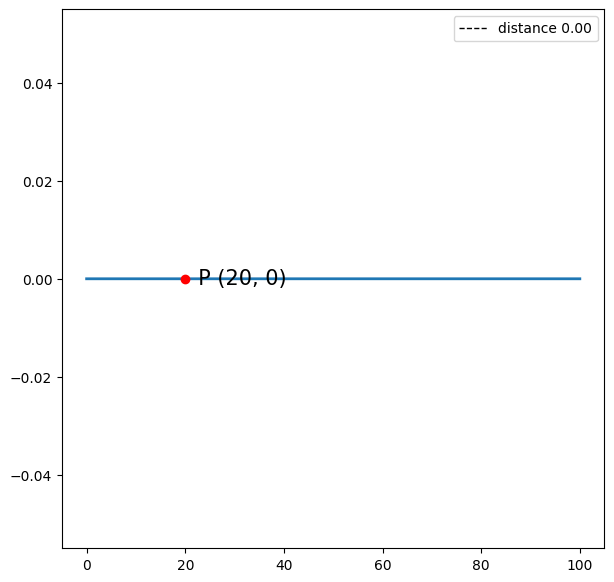

In [81]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(x, z, lw=2)
ax.plot(
    [P[0], min_x],
    [P[2], min_z],
    'k--', lw=1,
    label=f'distance {min_d:.2f}'
)

display_P = (P[0], P[2])
ax.plot(*display_P, 'or')
ax.text(
    P[0], P[2], 
    f"  P ({P[0]}, {P[2]})", 
    ha='left', va='center',
    fontsize=15
)
ax.legend()
plt.show()

# Test

In [87]:
positions = pickle.load(open(os.path.join(run_folder, "positions.pkl"), "rb"))
positions[-1]["time"]/1_000

145.92